#### Albert Javier
#### AML 3104
#### GIT https://github.com/albert-javier/fwi

In [214]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [215]:
# Reading dataset   

df=pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## 1. Data Cleaning and Preprocessing


In [216]:

# see the data types of the columns

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [217]:
# see the data has NA in it 

df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [218]:
# see the data has NULL in it 

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [219]:
# see the types of fields
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [220]:
# see basic statistics of the data

df.describe() 


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [221]:
# getting the value counts
classes=df['Classes']
classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [222]:
# getting the list of unique classes

classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [223]:
type(df["Classes"])

pandas.core.series.Series

In [224]:
# Applying the condition
df.loc[ df["Classes"].str.strip() == "fire", "Classes2"] = 1
df.loc[ df["Classes"].str.strip() == "not fire", "Classes2"] = 0

df["Classes2"] = df["Classes2"].astype('int32')


df["Classes"] = df["Classes2"]

print(df)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI  Classes  Region  

In [225]:
df[df['Classes2']==1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes2
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0,1
10,11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0,1
11,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,19,9,2012,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,1,1
233,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1,1,1
234,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1,1,1
235,23,9,2012,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1,1,1


In [226]:
df[df['Classes2']==0]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes2
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,1,0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,0


In [227]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [228]:
df['year'].value_counts()

year
2012    243
Name: count, dtype: int64

In [229]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes2
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,0


In [230]:
df=df.drop('Classes2',axis=1)    # drop the column because we transformed Classes column to numerical value
df=df.drop('year',axis=1)       # drop the column because there is only 1 value

In [231]:
# dataframe after dropping year and Classes
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


## 2. Data Visualization and Observations

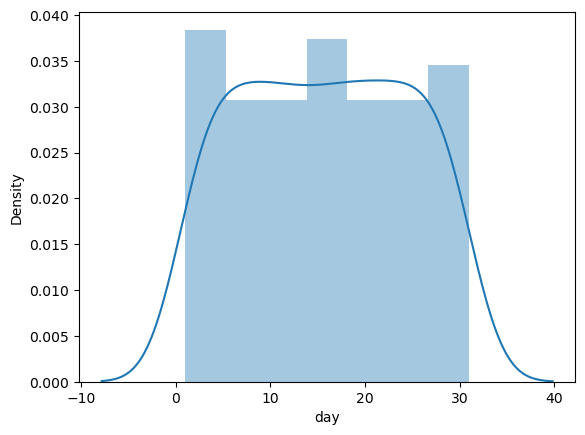

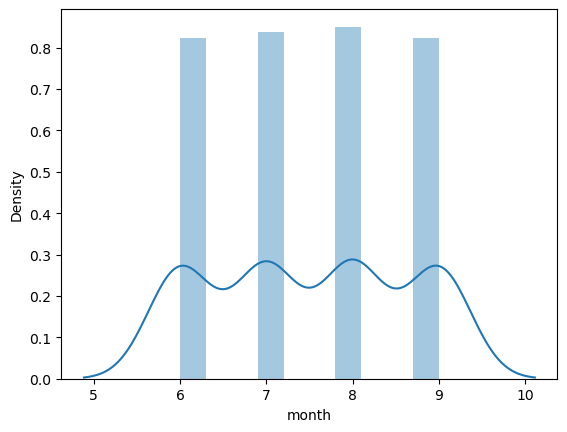

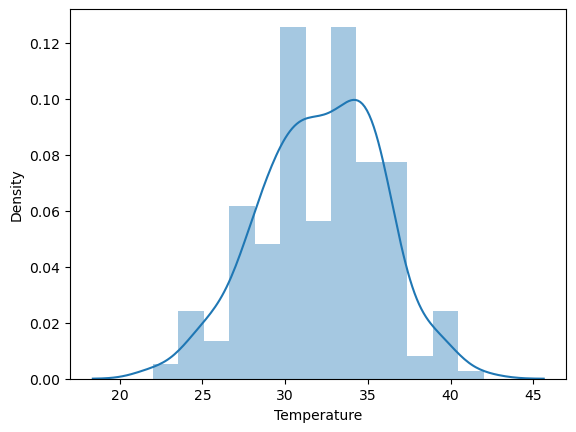

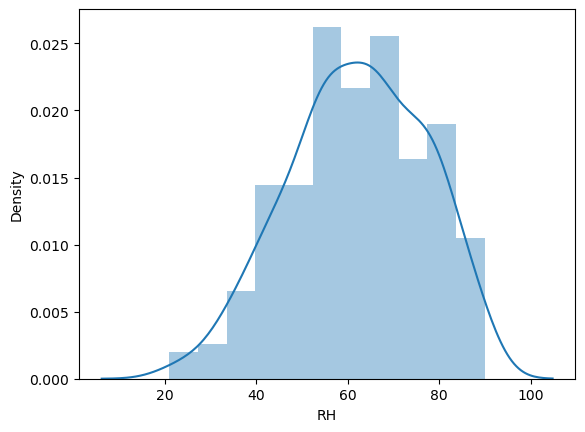

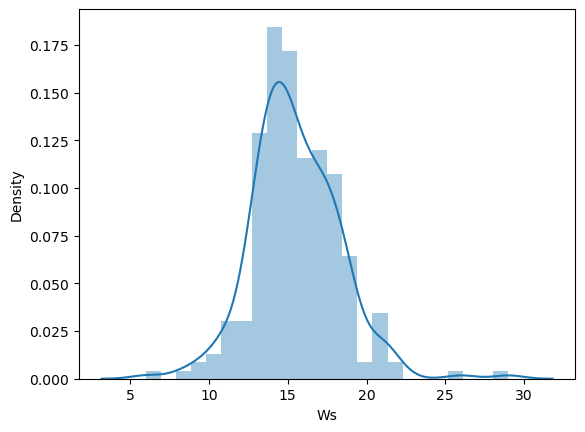

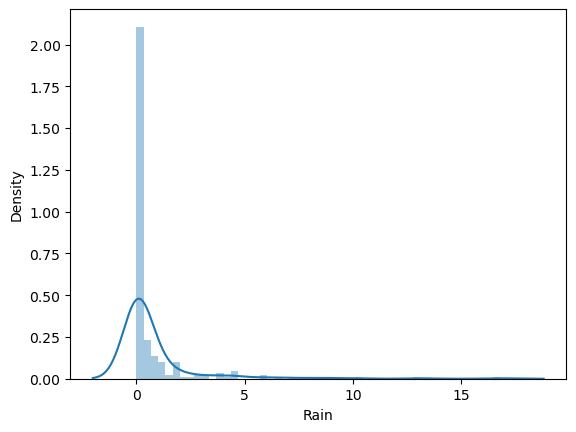

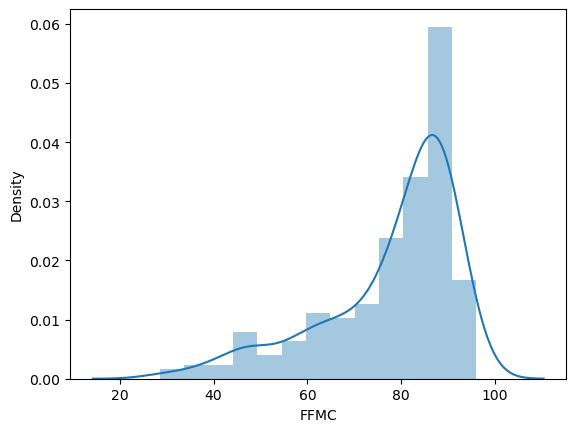

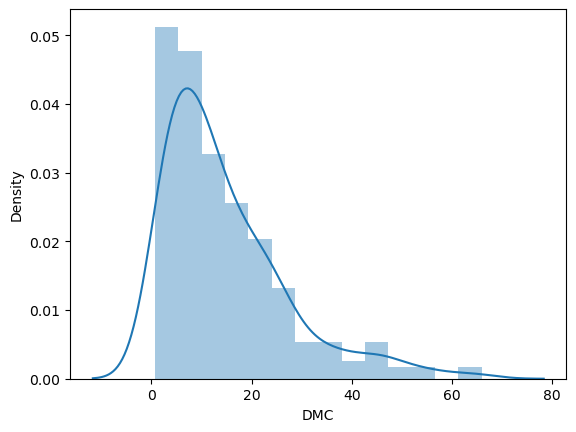

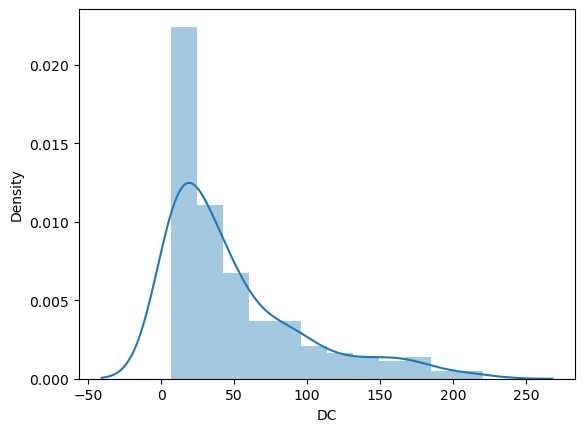

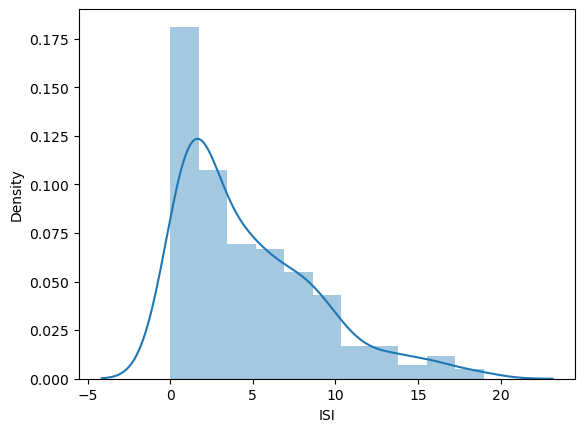

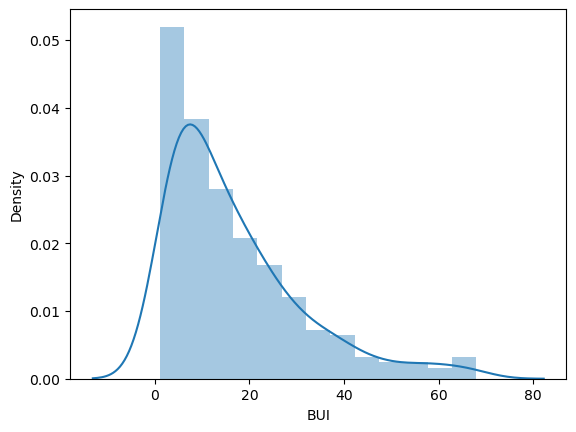

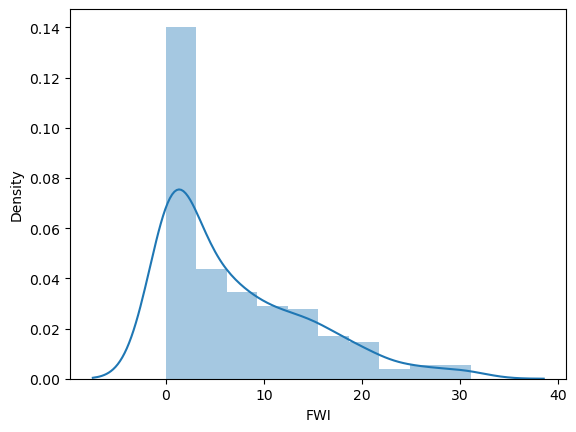

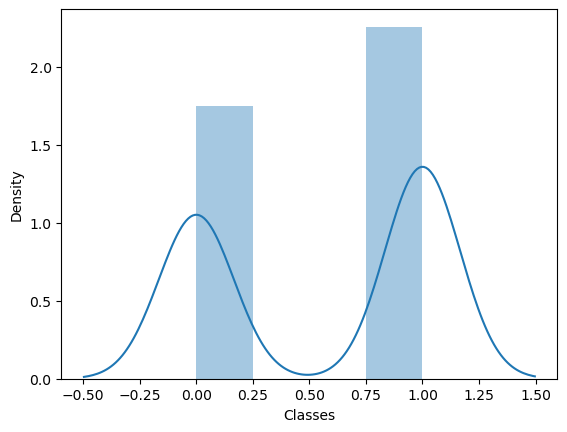

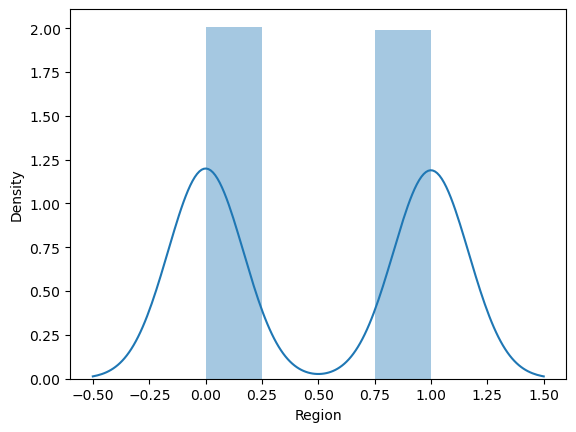

In [232]:
# univariate analysis
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

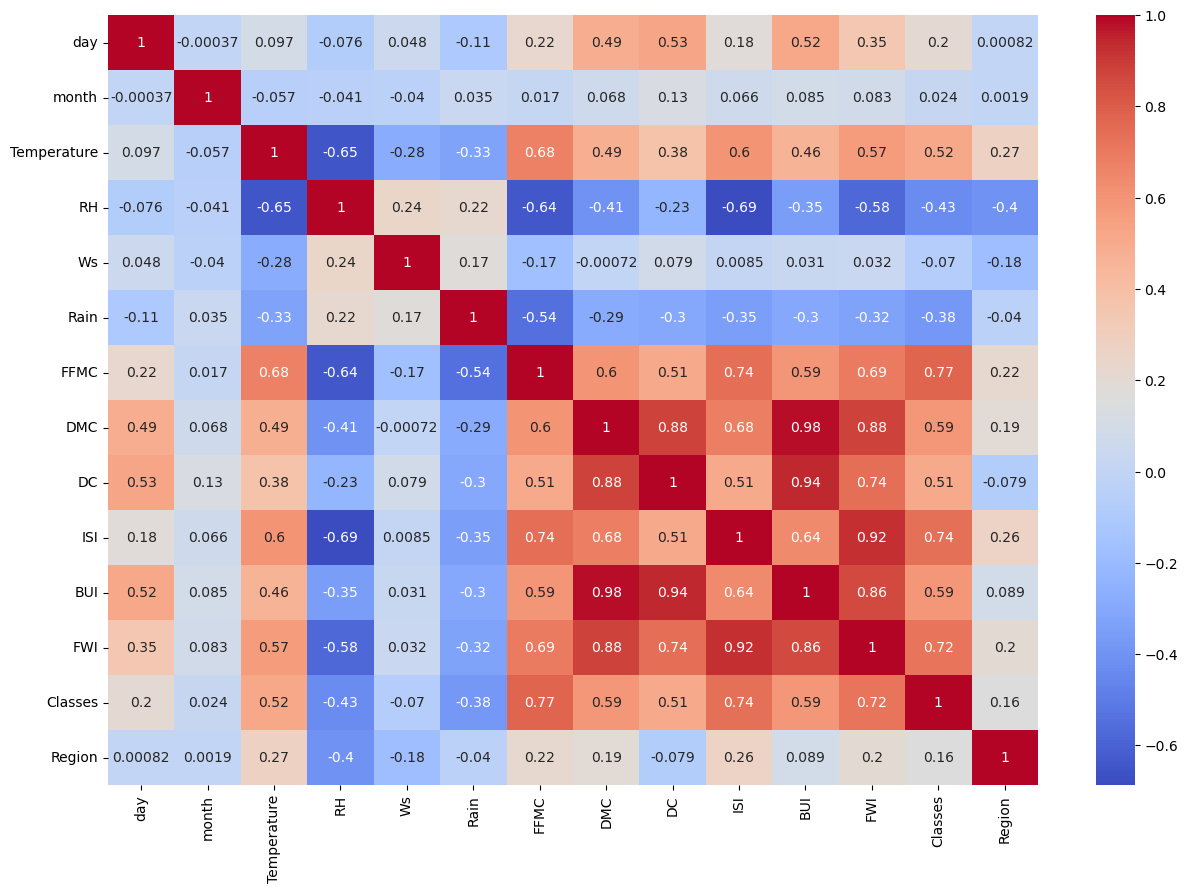

In [233]:
# to show correlation in visualize form 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [234]:
df=df.drop(['DMC','DC'],axis=1)    


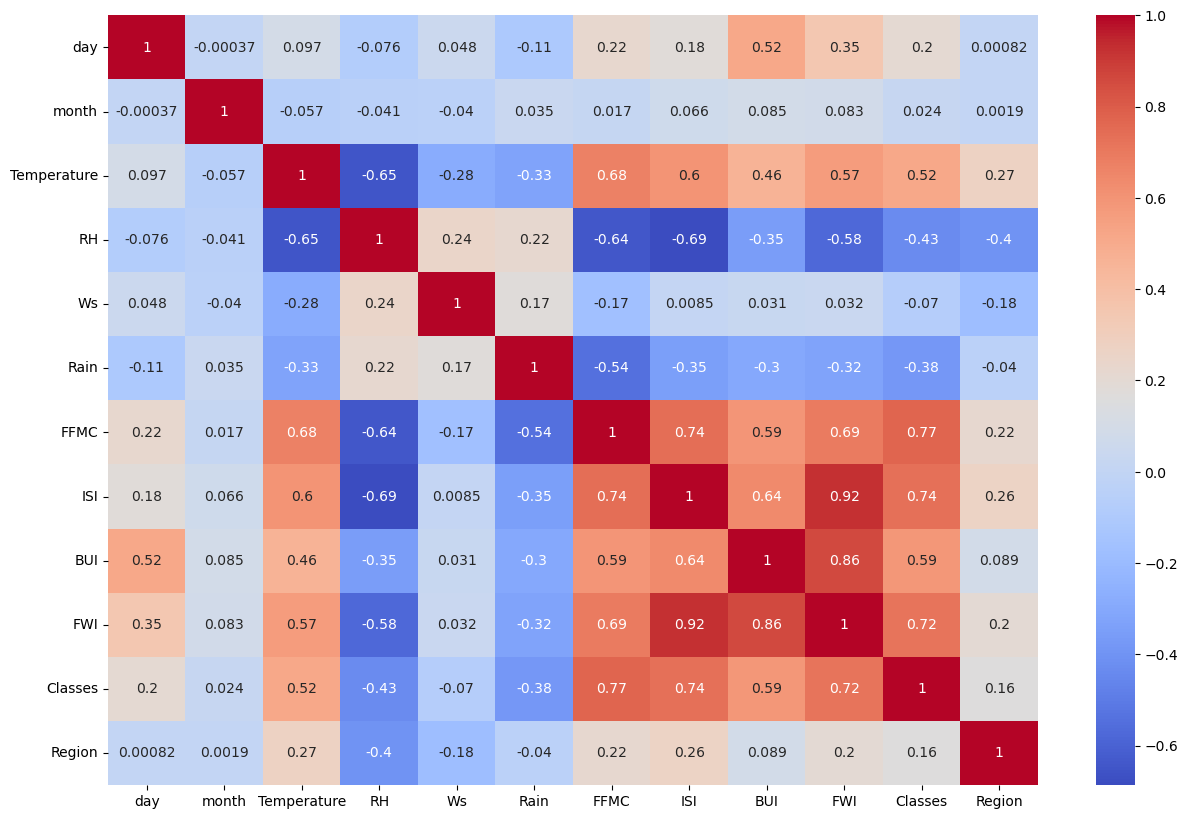

In [235]:
# to show correlation in visualize form 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 3. Model Development and Analysis

In [236]:
# split the data into Inputs and a target variable

x=df.drop(['Classes'], axis=1)
y=df['Classes']

In [237]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,4.5,16.9,6.5,1
239,27,9,28,87,15,4.4,41.1,0.1,6.2,0.0,1
240,28,9,27,87,29,0.5,45.9,0.4,3.4,0.2,1
241,29,9,24,54,18,0.1,79.7,1.7,5.1,0.7,1


In [238]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int32

In [239]:
# split the input data & target into train & test

from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [240]:
# shapes of train and test data
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((194, 11), (49, 11), (194,), (49,))

In [241]:
# type(x_test)

In [242]:
# x_test

In [243]:
from sklearn.preprocessing import StandardScaler

# Apply standardization to the training and testing data
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)



In [244]:
from sklearn.preprocessing import PolynomialFeatures

# Apply Polynomial Features (degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train_sc)
X_test_poly = poly.transform(x_test_sc)




In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [246]:
lr = LogisticRegression()


In [247]:
print("Performance Metrics of Logistic Regression Model")
print()
lr.fit(x_train_sc, y_train)
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)
y_pred_tr=lr.predict(x_train_sc) # prediction on train_data
y_pred_ts=lr.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")

print("confusion_matrix\n",confusion_matrix(y_pred_tr,y_train))
print("\naccuracy_score",accuracy_score(y_pred_tr,y_train))
print("\nclassification_report\n",classification_report(y_pred_tr,y_train))



print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")


print("confusion_matrix\n",confusion_matrix(y_pred_ts,y_test))
print("\naccuracy_score",accuracy_score(y_pred_ts,y_test))
print("\nclassification_report\n",classification_report(y_pred_ts,y_test))




Performance Metrics of Logistic Regression Model

coefficients [[-0.17648345 -0.03712181  0.1339652   0.2057742  -0.11328906  0.18166484
   2.49876832  2.25416863  0.53418759  1.8540029   0.16789984]]
intercept [1.70889408]


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
confusion_matrix
 [[ 82   2]
 [  2 108]]

accuracy_score 0.979381443298969

classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        84
           1       0.98      0.98      0.98       110

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
confusion_matrix
 [[21  1]
 

# Hyperparameter Tuning - LogisticRegression

In [248]:
parameters={'penalty':('l1','l2','elasticnet',None),'C':[1,10,20]}

In [249]:
clf = GridSearchCV( lr,param_grid=parameters,cv=5)

In [250]:
clf.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [251]:
clf.best_params_

{'C': 20, 'penalty': 'l2'}

In [252]:
lr = clf.best_estimator_ 

In [253]:
print("Performance Metrics of Logistic Regression Model with Hyperparameter Tuning")
print()
lr.fit(x_train_sc, y_train)
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)
y_pred_tr=lr.predict(x_train_sc) # prediction on train_data
y_pred_ts=lr.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")

print("confusion_matrix\n",confusion_matrix(y_pred_tr,y_train))
print("\naccuracy_score",accuracy_score(y_pred_tr,y_train))
print("\nclassification_report\n",classification_report(y_pred_tr,y_train))



print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")


print("confusion_matrix\n",confusion_matrix(y_pred_ts,y_test))
print("\naccuracy_score",accuracy_score(y_pred_ts,y_test))
print("\nclassification_report\n",classification_report(y_pred_ts,y_test))




Performance Metrics of Logistic Regression Model with Hyperparameter Tuning

coefficients [[-1.10204263e-01  1.85617745e-02 -3.92109811e-01  9.21113166e-02
   1.07458778e-03  1.36012152e+00  6.47259453e+00  6.31698894e+00
   1.69239923e-01  4.55830966e+00 -6.82188905e-02]]
intercept [4.63135308]


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
confusion_matrix
 [[ 82   2]
 [  2 108]]

accuracy_score 0.979381443298969

classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        84
           1       0.98      0.98      0.98       110

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194


------------------------------------------------------------------------------------------------------------------

In [ ]:
# after hyperparameter tuning the accuracy is increased from  0.9591836734693877 to 0.9795918367346939 for test data



## Saving the Model

In [254]:
import pickle

#save model/ serialize/ encrypt model

pickle.dump(scaler, open('fwi_scaler.pkl','wb') )
pickle.dump(lr, open('fwi_lr_model.pkl','wb') )


## Testing the Model

In [255]:
Unknown_data={  'day':[1],
                'month':[6] ,
                'year':[2012],
                'Temperature':[29],
                'RH':[57],
                'Ws':[18],
                'Rain':[0.0],
                'FFMC':[65.7],
                'DMC':[3.4],
                'DC':[7.6],
                'ISI':[1.3],
                'BUI':[3.4],
                'FWI':[0.5],
                'Classes':['not fire'],
                'Region':[0]                
                }
df1=pd.DataFrame(Unknown_data)

df1.loc[ df1["Classes"].str.strip() == "fire", "Classes2"] = 1
df1.loc[ df1["Classes"].str.strip() == "not fire", "Classes2"] = 0
df1["Classes2"] = df1["Classes2"].astype('int32')

df1["Classes"] = df1["Classes2"]

df1=df1.drop('Classes2',axis=1) 
df1=df1.drop('Classes',axis=1) 
df1=df1.drop('year',axis=1) 
df1=df1.drop(['DMC','DC'],axis=1)    


df1

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,0


In [256]:
import pickle

scaler1 = pickle.load(open('fwi_scaler.pkl','rb'))
lr_model1 = pickle.load(open('fwi_lr_model.pkl','rb'))


sc_df1 = scaler1.transform(df1)
y_pred_= lr_model1.predict(sc_df1) 

y_pred_


array([0])

In [257]:

if y_pred_[0] == 1:    
    print("fire")   
elif y_pred_[0] == 0:    
    print("not fire")      
else:       
    print("not fire")   



not fire
